# Fifa19 Exercise - Solutions

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [Fifa19 Dataset](https://www.kaggle.com/winterbreeze/fifa19eda) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

#### Read fifa_eda.csv 

In [1]:
import pandas as pd
import numpy as np
import seaborn as se 


In [2]:
fifa = pd.read_csv('fifa_eda.csv')
fifa

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


### New Part Visualiztion Questions

#### Draw the outliers of players value

<AxesSubplot:xlabel='Value'>

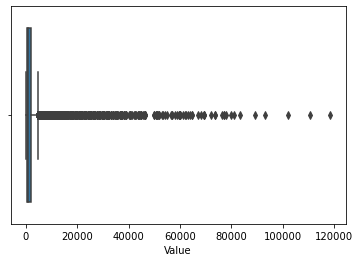

In [3]:
Value = fifa['Value'].to_frame()
se.boxplot(data = Value,x = 'Value' )

#### find the average wage for each Nationality and draw the outliers in value for the top 5 nationality

In [4]:
nw=fifa.groupby(fifa['Nationality']).mean()['Value'].sort_values(ascending=False).head(5)
n1=nw.index
ns=fifa.groupby(fifa['Nationality']).mean()['Value'].sort_values(ascending=False).head(5).to_frame()
ns['Nationality']=n1
ns

,Value,Nationality
Nationality,,
United Arab Emirates,10500.000000,United Arab Emirates
Dominican Republic,10400.000000,Dominican Republic
Central African Rep.,10050.000000,Central African Rep.
Egypt,6658.750000,Egypt
Gabon,6628.333333,Gabon


<AxesSubplot:xlabel='Value', ylabel='Nationality'>

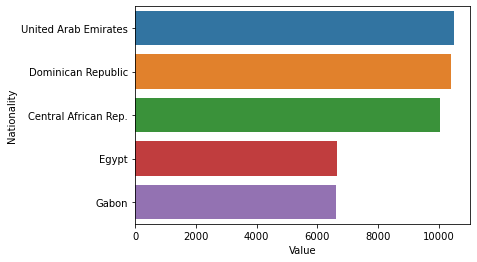

In [5]:
se.barplot(data = ns , x ='Value',y='Nationality')

#### Draw the distripution of players Height

<AxesSubplot:xlabel='Height', ylabel='Density'>

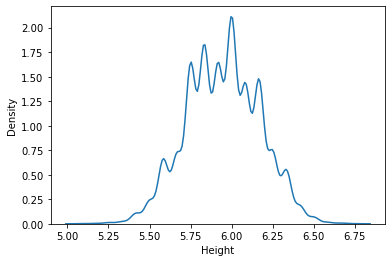

In [6]:
n1 = fifa['Height'].to_frame()
se.kdeplot(data = n1, x='Height' )

#### What are the top 10 clubs in the wage and visualize the results ?

In [7]:
f = fifa.groupby('Club').sum()['Wage'].sort_values(ascending=False).head(10).to_frame()
s= fifa.groupby('Club').sum()['Wage'].sort_values(ascending=False).head(10).index
f['Clup'] =s
f

,Wage,Clup
Club,,
Real Madrid,5017.0,Real Madrid
FC Barcelona,4837.0,FC Barcelona
Manchester City,3741.0,Manchester City
Manchester United,3391.0,Manchester United
Juventus,3292.0,Juventus
Chelsea,3249.0,Chelsea
Liverpool,2902.0,Liverpool
Tottenham Hotspur,2623.0,Tottenham Hotspur
Arsenal,2588.0,Arsenal


<AxesSubplot:xlabel='Wage', ylabel='Clup'>

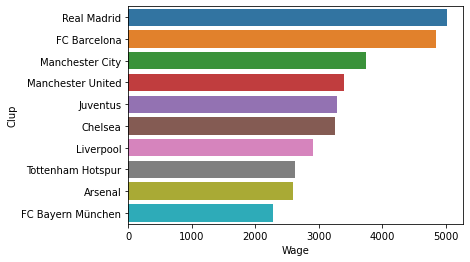

In [8]:
se.barplot(data = f,x='Wage',y='Clup')

#### is there any outlier in the Age find it with 1- visualization 2-  with pandas ?

<AxesSubplot:xlabel='Age'>

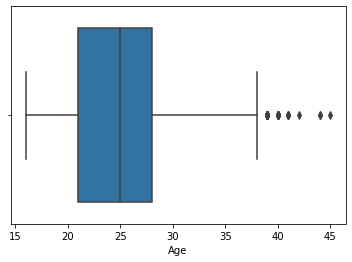

In [9]:
Value = fifa['Age'].to_frame()
se.boxplot(data = Value,x = 'Age' )

#### Is there a correlation between Value and Overall and viusalize the results with two graphs?**

<AxesSubplot:xlabel='Overall', ylabel='Value'>

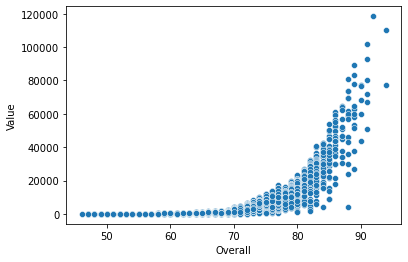

In [10]:
d = fifa.loc[:,['Overall','Value']]
se.scatterplot(data = d , x = 'Overall', y = 'Value')

#### what are the ratio of the Preferred Foot and visualize with a graph ?

In [11]:
z = fifa['Preferred Foot'].value_counts().to_frame().index
h = fifa['Preferred Foot'].value_counts().to_frame()
h['Ratio']=z
h

,Preferred Foot,Ratio
Right,13996,Right
Left,4211,Left


<AxesSubplot:xlabel='Preferred Foot', ylabel='Ratio'>

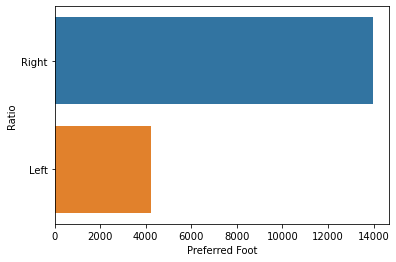

In [12]:
se.barplot(data = h ,x = 'Preferred Foot',y = 'Ratio')

#### what are the top 10 average overall clubs and visualize with a graph ?

<AxesSubplot:xlabel='Overall', ylabel='Club'>

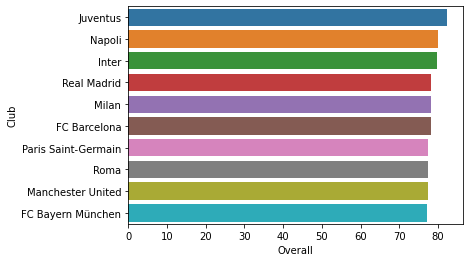

In [13]:
d = fifa.groupby('Club').mean()['Overall'].sort_values(ascending= False).head(10).index
r =fifa.groupby('Club').mean()['Overall'].sort_values(ascending= False).head(10).to_frame()
r['Club']=d
se.barplot(data = r ,x = 'Overall',y = 'Club')

**What are the top 5 most common nationality and visualize them with a graph?**

In [14]:
c = fifa['Nationality'].value_counts().head(5).index
j =fifa['Nationality'].value_counts().head(5).to_frame()
j['common']=c
j

,Nationality,common
England,1662,England
Germany,1198,Germany
Spain,1072,Spain
Argentina,937,Argentina
France,914,France


<AxesSubplot:xlabel='Nationality', ylabel='common'>

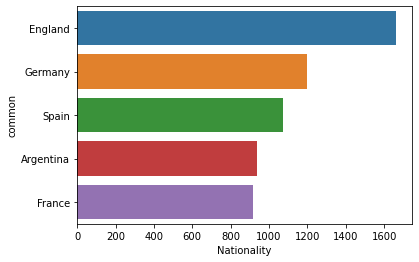

In [15]:
se.barplot(data = j ,x = 'Nationality',y = 'common')